In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')

In [8]:
df.tail()

,Unnamed: 0,location,town,mortality,hardness
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81
60,61,North,York,1378,71


In [5]:
df.info()  #Проверяем пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


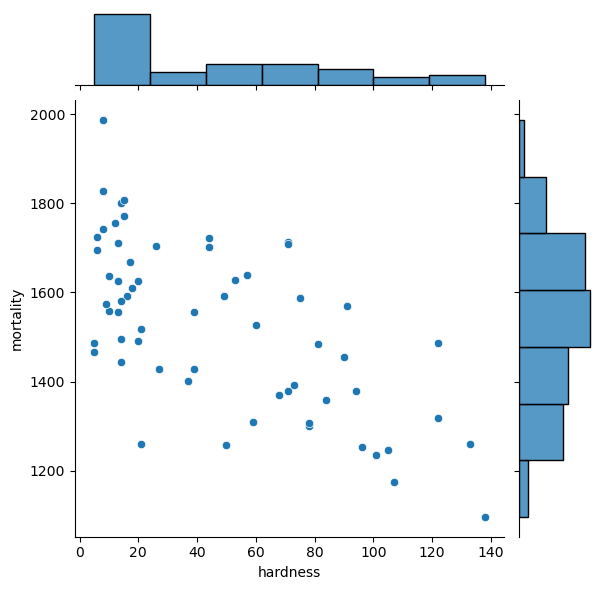

In [14]:
sns.jointplot(x='hardness', y ='mortality', data=df) #Точеченая диаграмма отношения смертности и жесткости воды

In [4]:
df.corr() # корреляция между всеми показателями

C:\Users\Павел\AppData\Local\Temp\ipykernel_9452\1779067559.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # корреляция между всеми показателями


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


In [19]:
df[['hardness', 'mortality']].corr(method='spearman') #Здесь мы видим не большую обратную взаимосвясь между этими параметрами

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['mortality']]
y = df['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
lm.coef_   #Значение отрицательное так как считаю что данных малое количество и между ними недостаточная взаимосвязь

array([-0.13055019])

In [7]:
lm.intercept_

245.26119532596618

In [ ]:
# y = -0.13 * x + 245.26 уровнение 

In [17]:
y_pred = lm.predict(X_test)
y_pred

array([82.46510589, 41.86399617, 50.08865827, 23.06476852, 74.63209437,
       33.11713331, 80.89850358, 38.0780406 , 46.95545366, 23.84806967,
       74.37099398, 51.39416019, 42.25564675, 10.2708497 , 22.15091718,
       58.83552113])

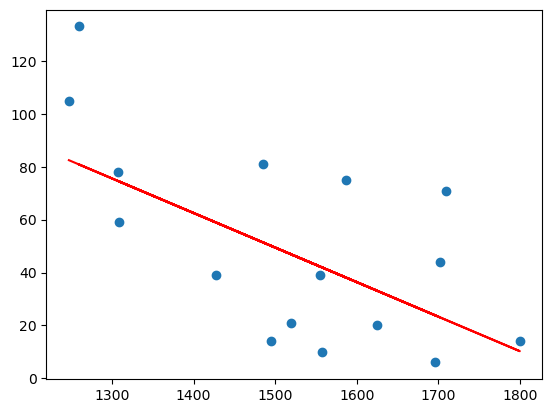

In [11]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [18]:
import sklearn.metrics as metrics

print(f'R2: {metrics.r2_score(y_test, y_pred)}')       #Коэф детерминации

R2: 0.4064232419990478


<Axes: xlabel='hardness', ylabel='Count'>

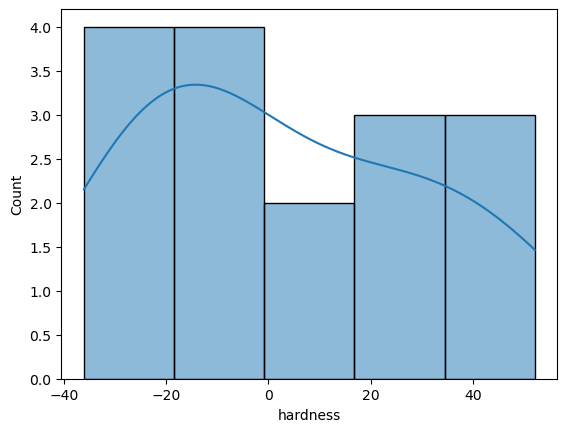

In [13]:
sns.histplot((y_test-y_pred), kde=True) #Ошибки распределены не нормально следовательно это говорит о том что взаимосвязь не линейна 

In [6]:
#Разделим датафрейм на северный и южный, и произведем иследования по отдельности
south = df[df.location == 'South']
north = df[df.location == 'North']

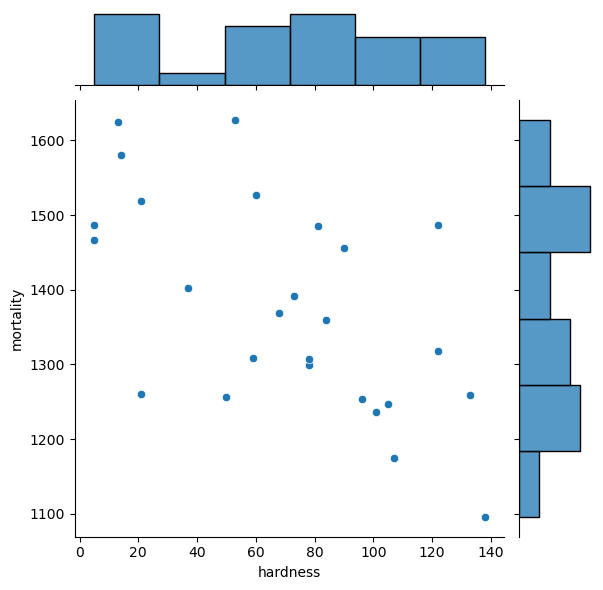

In [19]:
#начнем с Южных регионов
sns.jointplot(x='hardness', y ='mortality', data=south)

In [20]:
south[['hardness', 'mortality']].corr(method='spearman') #Также отрицательная корреляция, а значит обратная взаимосвязь

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [21]:
south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [8]:
X = south[['mortality']]
y = south['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm = LinearRegression()

In [9]:
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
lm.coef_  #Коэф примерно такой же

array([-0.19144129])

In [11]:
lm.intercept_

335.5684282411057

In [12]:
y_pred = lm.predict(X_test)
y_pred

array([83.24880482, 51.0866677 , 96.84113659, 51.0866677 , 67.16773626,
       94.35239978, 84.97177646])

In [13]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')   #Коэф детерминации не самый удачный, на мой взгляд из за недостатка данных.

R2: -0.08799594721906723


<Axes: xlabel='hardness', ylabel='Count'>

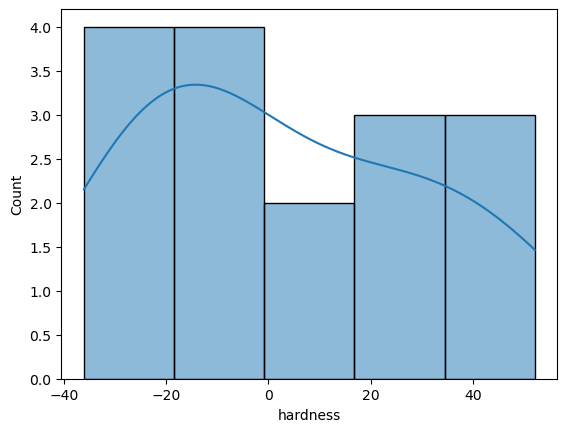

In [19]:
sns.histplot((y_test-y_pred), kde=True) #Распределение ошибок

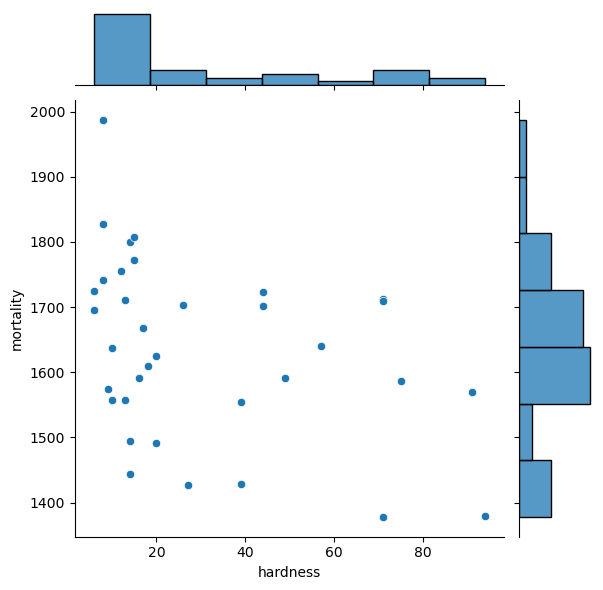

In [20]:
#Теперь рассмотрим северные регионы
sns.jointplot(x='hardness', y ='mortality', data=north)

In [21]:
north[['hardness', 'mortality']].corr(method='spearman') #Отрицательная корреляция как и было до этого

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [22]:
north[['hardness', 'mortality']].corr(method='kendall') #Достаточно низкий коэф из за малого количества данных

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [23]:
X = north[['mortality']]
y = north['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm = LinearRegression()

In [24]:
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
lm.coef_

array([-0.09308216])

In [26]:
lm.intercept_

183.5328689819372

In [27]:
y_pred = lm.predict(X_test) 
y_pred

array([-1.42138494, 37.02154756, 49.12222849, 23.0592234 , 35.43915082,
       24.08312717, 25.10703095, 21.38374451, 38.79010861])

In [28]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')   #Коэф детерминации

R2: -0.3584368285924575


<Axes: xlabel='hardness', ylabel='Count'>

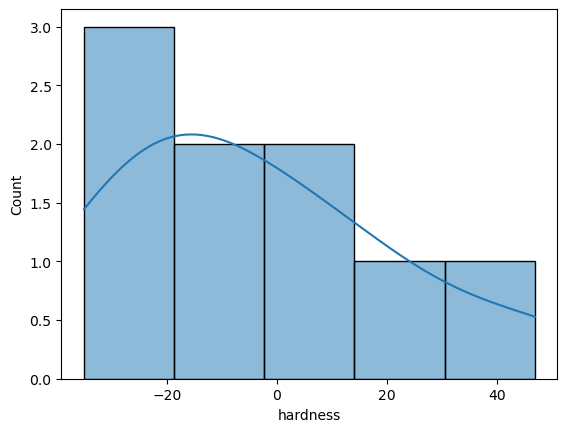

In [29]:
sns.histplot((y_test-y_pred), kde=True)  #Распределение ошибок

## В целом зависимость сохраняется. Регионы по отдельности, также имеют отрицательную корреляцию, c не большим изменением коэффициентов из за недостатка данных.